<a href="https://www.kaggle.com/code/brmil07/chemical-classification?scriptVersionId=165715372" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Chemical Classification 🧪**
---

## **Data Preparation 📂**
---

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gas-classification-dataset/chemicals_in_wind_tunnel.csv
/kaggle/input/gas-classification-dataset/chemicals_wind_tunnel_3.csv


## **Importing the Libraries 📚**
---

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# **Exploratory Data Analysis 🌄**
---

In [3]:
df = pd.read_csv('/kaggle/input/gas-classification-dataset/chemicals_in_wind_tunnel.csv', index_col=0)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17921 entries, 0 to 17920
Columns: 289 entries, mean_A1 to Chemical
dtypes: float64(288), object(1)
memory usage: 39.7+ MB


In [5]:
df.head()

,mean_A1,mean_A2,mean_A3,mean_A4,mean_A5,mean_A6,mean_A7,mean_A8,mean_B1,mean_B2,...,max_H8,max_I1,max_I2,max_I3,max_I4,max_I5,max_I6,max_I7,max_I8,Chemical
0,0.110274,0.100774,0.177316,0.081529,0.225642,0.254600,0.250679,0.239913,0.070038,0.088185,...,0.213135,0.074219,0.071777,0.115723,0.097656,0.201172,0.178223,0.232178,0.253662,Acetaldehyde_500
1,0.114903,0.117785,0.187970,0.097983,0.213534,0.242186,0.238034,0.228992,0.075349,0.104410,...,0.200684,0.079346,0.084229,0.125000,0.107178,0.195557,0.172119,0.225098,0.246826,Acetaldehyde_500
2,0.118138,0.128888,0.195197,0.110886,0.204072,0.232273,0.229351,0.221341,0.082085,0.122991,...,0.194580,0.084717,0.100098,0.135010,0.132080,0.181396,0.159180,0.210938,0.231445,Acetaldehyde_500
3,0.123282,0.143118,0.204956,0.127255,0.196539,0.224175,0.220981,0.213877,0.089352,0.139451,...,0.186768,0.088623,0.109375,0.140869,0.148682,0.166992,0.146729,0.197021,0.215576,Acetaldehyde_500
4,0.130403,0.159920,0.216208,0.146859,0.188552,0.215028,0.211930,0.205568,0.098506,0.157591,...,0.176270,0.091553,0.117676,0.145752,0.161865,0.157227,0.138184,0.185791,0.203369,Acetaldehyde_500


In [6]:
df.describe()

,mean_A1,mean_A2,mean_A3,mean_A4,mean_A5,mean_A6,mean_A7,mean_A8,mean_B1,mean_B2,...,max_H7,max_H8,max_I1,max_I2,max_I3,max_I4,max_I5,max_I6,max_I7,max_I8
count,17921.000000,17921.000000,17921.000000,17921.000000,17921.000000,17921.000000,17921.000000,17921.000000,17921.000000,17921.000000,...,17921.000000,17921.000000,17921.000000,17921.000000,17921.000000,17921.000000,17921.000000,17921.000000,17921.000000,17921.000000
mean,0.113816,0.125939,0.188913,0.104609,0.196204,0.222991,0.216332,0.208546,0.076995,0.120509,...,0.192296,0.185549,0.081673,0.097353,0.130306,0.135430,0.173226,0.150823,0.202596,0.222015
std,0.015489,0.027048,0.021832,0.037621,0.018407,0.019773,0.023462,0.021739,0.010679,0.023314,...,0.020706,0.021684,0.010145,0.018497,0.015155,0.046745,0.019832,0.017740,0.021411,0.022932
min,0.077624,0.066902,0.135246,0.030522,0.137013,0.152955,0.132964,0.129567,0.049982,0.069073,...,0.131592,0.121094,0.058350,0.055420,0.093018,0.056641,0.127930,0.110352,0.152832,0.166748
25%,0.103377,0.105660,0.173425,0.079346,0.183695,0.209859,0.202844,0.196144,0.068934,0.102492,...,0.178223,0.171143,0.075684,0.084473,0.120850,0.106689,0.158447,0.137695,0.186523,0.204590
50%,0.112461,0.124970,0.187662,0.101362,0.195725,0.222803,0.216507,0.208827,0.076428,0.120534,...,0.192139,0.185303,0.081055,0.097656,0.130127,0.129150,0.171631,0.149170,0.201172,0.220703
75%,0.122558,0.143799,0.202221,0.123404,0.208651,0.236664,0.232265,0.222998,0.084786,0.138713,...,0.206299,0.200439,0.086426,0.109619,0.138672,0.152100,0.186279,0.162598,0.217041,0.237549
max,0.211024,0.310942,0.309874,0.597236,0.438342,0.469775,0.472173,0.460584,0.128835,0.179745,...,0.443848,0.433838,0.156006,0.201904,0.229004,0.658691,0.404541,0.373291,0.445312,0.466309


In [7]:
# Check for duplicates
df.duplicated().sum()

0

In [8]:
# Check for missing values
df.isna().sum()

mean_A1     0
mean_A2     0
mean_A3     0
mean_A4     0
mean_A5     0
           ..
max_I5      0
max_I6      0
max_I7      0
max_I8      0
Chemical    0
Length: 289, dtype: int64

In [9]:
df[df.isna().any(axis=1)]

,mean_A1,mean_A2,mean_A3,mean_A4,mean_A5,mean_A6,mean_A7,mean_A8,mean_B1,mean_B2,...,max_H8,max_I1,max_I2,max_I3,max_I4,max_I5,max_I6,max_I7,max_I8,Chemical


In [10]:
df.nunique()

mean_A1     16114
mean_A2     16901
mean_A3     16687
mean_A4     17018
mean_A5     16451
            ...  
max_I5        527
max_I6        469
max_I7        559
max_I8        595
Chemical       11
Length: 289, dtype: int64

In [11]:
df['Chemical'].value_counts(ascending=True)

Chemical
CO_1000              450
Butanol_100         1500
CO_4000             1571
Acetaldehyde_500    1800
Acetone_2500        1800
Ammonia_10000       1800
Benzene_200         1800
Ethylene_500        1800
Methane_1000        1800
Methanol_200        1800
Toluene_200         1800
Name: count, dtype: int64

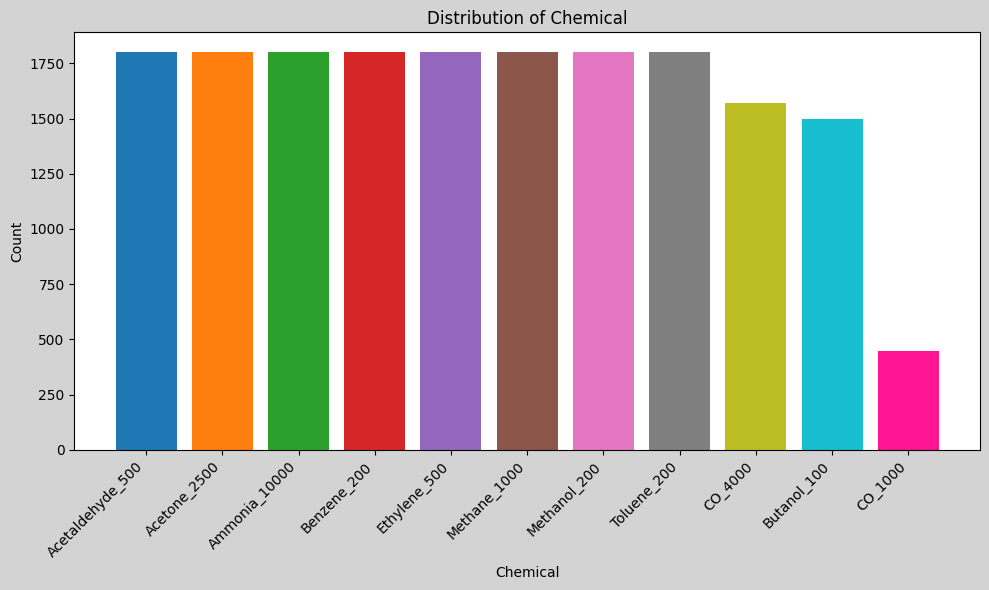

In [12]:
# Calculate the value counts
value_counts = df["Chemical"].value_counts()

# Define colors for each bar
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#ff1493']

# Create a bar plot
plt.figure(figsize=(10, 6), facecolor='lightgrey')
plt.bar(value_counts.index, value_counts, color=colors)

# Adding labels and title
plt.xlabel('Chemical')
plt.ylabel('Count')
plt.title('Distribution of Chemical')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()

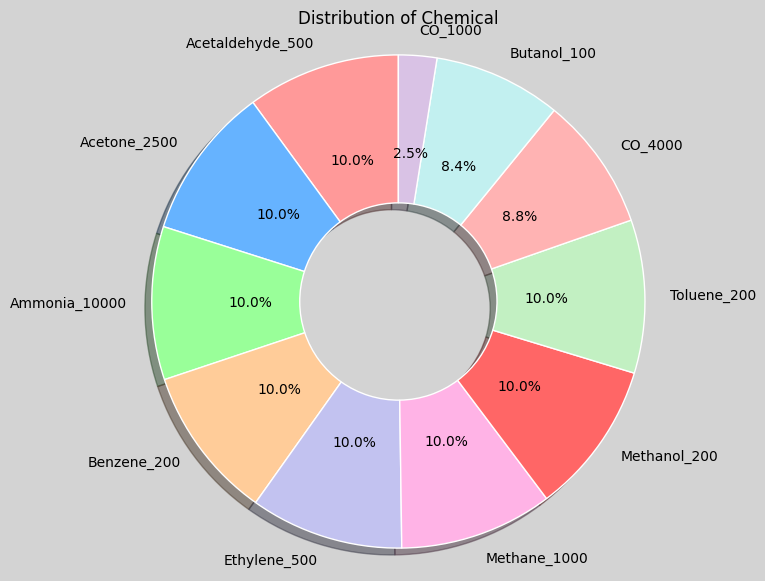

In [13]:
# Define colors for each wedge
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#ff6666', '#c2f0c2', '#ffb3b3', '#c2f0f0', '#d9c2e5']

# Create a pie chart
plt.figure(figsize=(7, 7), facecolor='lightgrey')
plt.pie(value_counts,
        explode=(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0),
        labels=value_counts.index,
        autopct='%1.1f%%',
        shadow=True,
        startangle=90,
        wedgeprops=dict(width=0.6, edgecolor='w'),
        colors=colors)  

plt.title('Distribution of Chemical')
plt.axis('equal') 
plt.show()

In [14]:
t_df = df.copy()
label_encoder = LabelEncoder()
t_df['Chemical_Encoded'] = label_encoder.fit_transform(t_df['Chemical'])
t_df = t_df.drop(columns=['Chemical'])
t_df

,mean_A1,mean_A2,mean_A3,mean_A4,mean_A5,mean_A6,mean_A7,mean_A8,mean_B1,mean_B2,...,max_H8,max_I1,max_I2,max_I3,max_I4,max_I5,max_I6,max_I7,max_I8,Chemical_Encoded
0,0.110274,0.100774,0.177316,0.081529,0.225642,0.254600,0.250679,0.239913,0.070038,0.088185,...,0.213135,0.074219,0.071777,0.115723,0.097656,0.201172,0.178223,0.232178,0.253662,0
1,0.114903,0.117785,0.187970,0.097983,0.213534,0.242186,0.238034,0.228992,0.075349,0.104410,...,0.200684,0.079346,0.084229,0.125000,0.107178,0.195557,0.172119,0.225098,0.246826,0
2,0.118138,0.128888,0.195197,0.110886,0.204072,0.232273,0.229351,0.221341,0.082085,0.122991,...,0.194580,0.084717,0.100098,0.135010,0.132080,0.181396,0.159180,0.210938,0.231445,0
3,0.123282,0.143118,0.204956,0.127255,0.196539,0.224175,0.220981,0.213877,0.089352,0.139451,...,0.186768,0.088623,0.109375,0.140869,0.148682,0.166992,0.146729,0.197021,0.215576,0
4,0.130403,0.159920,0.216208,0.146859,0.188552,0.215028,0.211930,0.205568,0.098506,0.157591,...,0.176270,0.091553,0.117676,0.145752,0.161865,0.157227,0.138184,0.185791,0.203369,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17916,0.090209,0.081975,0.152585,0.091519,0.197655,0.224110,0.221826,0.213248,0.059393,0.079737,...,0.204102,0.075195,0.076660,0.117676,0.118408,0.185303,0.160889,0.217041,0.238281,10
17917,0.096285,0.098654,0.164511,0.109453,0.197884,0.225689,0.212466,0.204733,0.065996,0.102331,...,0.197021,0.078613,0.090820,0.125000,0.135986,0.176025,0.152588,0.204834,0.226318,10
17918,0.100616,0.112874,0.174178,0.129559,0.185512,0.212349,0.199964,0.193657,0.071461,0.117418,...,0.183350,0.080078,0.095947,0.127686,0.146729,0.170166,0.147461,0.200195,0.220703,10
17919,0.106454,0.128040,0.185289,0.151214,0.175583,0.201057,0.188939,0.183624,0.077144,0.129645,...,0.171387,0.084473,0.106445,0.134521,0.160645,0.162598,0.140869,0.189941,0.209961,10


In [15]:
# Get value counts for both original and encoded columns
value_counts_original = df['Chemical'].value_counts().reset_index()
value_counts_original.columns = ['Chemical', 'Original_Value_Count']

value_counts_encoded = t_df['Chemical_Encoded'].value_counts().reset_index()
value_counts_encoded.columns = ['Encoded_Value', 'Encoded_Value_Count']

# Concatenate the actual and encoded data along with their value counts
summary_df = pd.concat([value_counts_original, value_counts_encoded], axis=1)
summary_df = summary_df.drop(columns=['Original_Value_Count', 'Encoded_Value_Count'])

print("Actual and Labeled Data:")
print(summary_df)

Actual and Labeled Data:
            Chemical  Encoded_Value
0   Acetaldehyde_500              0
1       Acetone_2500              1
2      Ammonia_10000              2
3        Benzene_200              3
4       Ethylene_500              7
5       Methane_1000              8
6       Methanol_200              9
7        Toluene_200             10
8            CO_4000              6
9        Butanol_100              4
10           CO_1000              5


**The encoded column 'Chemical'**:
* Acetaldehyde_500 -> 0
* Acetone_2500     -> 1
* Ammonia_10000    -> 2
* Benzene_200      -> 3
* Butanol_100      -> 4
* CO_1000          -> 5
* CO_4000          -> 6
* Ethylene_500     -> 7
* Methane_1000     -> 8
* Methanol_200     -> 9
* Toluene_200      -> 10

# **Dataset Preprocessing ⚙️**
---

In [16]:
# Column 'Chemical' is the target variable
X = df.drop(['Chemical'], axis=1)
y = df['Chemical']

# Fit and transform the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Model Building 🤖**
---

In [17]:
# Initialize Machine Learning Model (Random Forest Classifier)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# **Feature Importance 🧵**
---

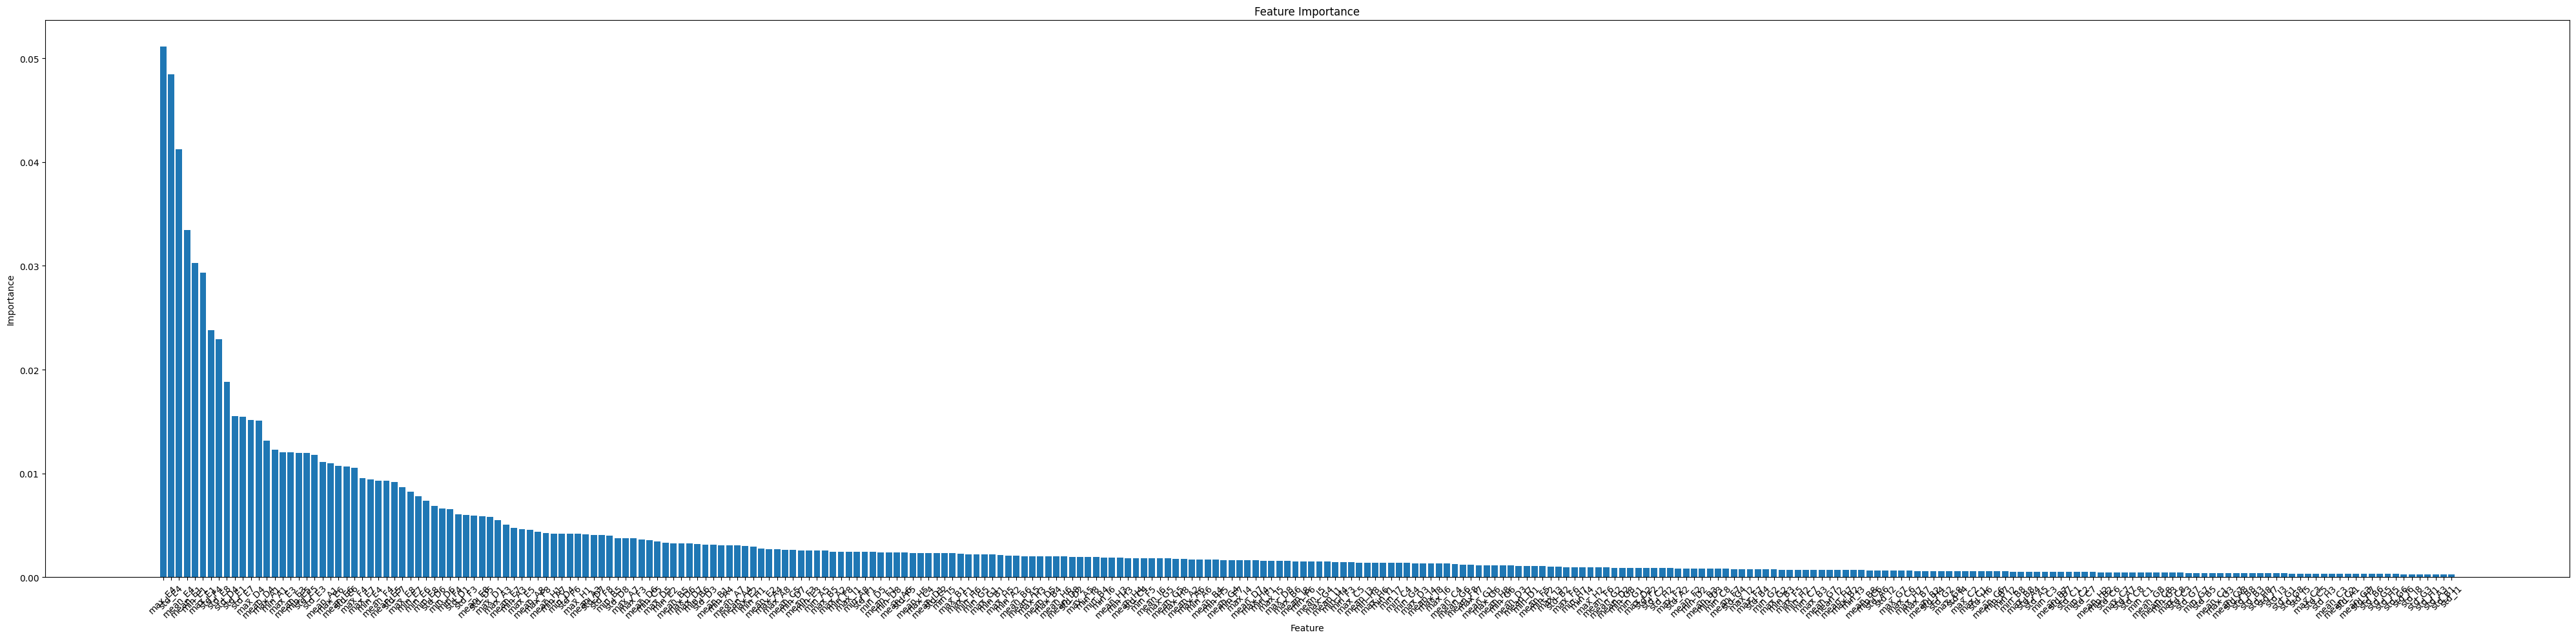

In [18]:
# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Get feature names
feature_names = X_train.columns

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot
plt.figure(figsize=(40, 10))
plt.bar(range(len(feature_importances)), sorted_feature_importances, tick_label=sorted_feature_names)
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Making Predictions 🔮**
---

In [19]:
# Making predictions for train and test data
y_pred_train = rf_classifier.predict(X_train)
y_pred_test = rf_classifier.predict(X_test)

# **Model Evaluation 📝**
---

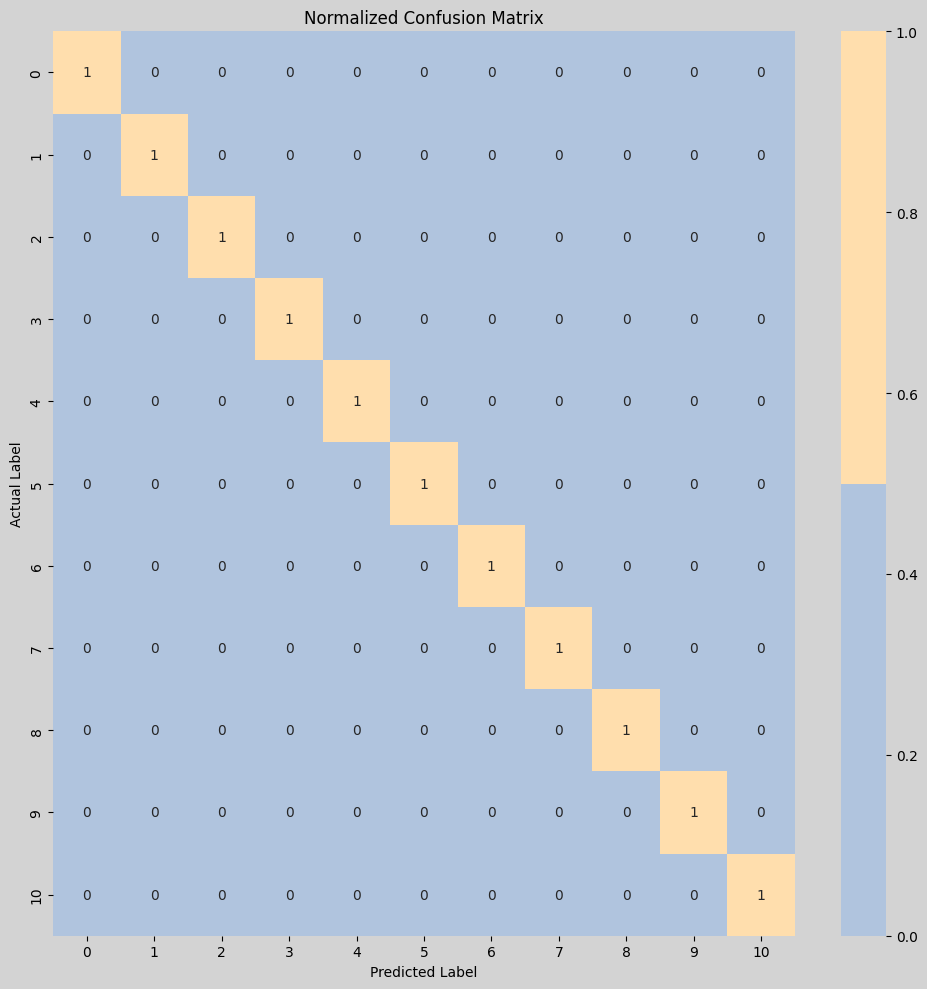

Train Accuracy: 100.0 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1441
           1       1.00      1.00      1.00      1435
           2       1.00      1.00      1.00      1450
           3       1.00      1.00      1.00      1445
           4       1.00      1.00      1.00      1182
           5       1.00      1.00      1.00       364
           6       1.00      1.00      1.00      1216
           7       1.00      1.00      1.00      1425
           8       1.00      1.00      1.00      1460
           9       1.00      1.00      1.00      1438
          10       1.00      1.00      1.00      1480

    accuracy                           1.00     14336
   macro avg       1.00      1.00      1.00     14336
weighted avg       1.00      1.00      1.00     14336



In [20]:
# Plot the confusion matrix
train_conf_matrix = confusion_matrix(y_train, y_pred_train, normalize='true')
plt.figure(figsize=(10, 10), facecolor='lightgrey')
sns.heatmap(train_conf_matrix, annot=True,cmap=['lightsteelblue','navajowhite'])
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.tight_layout()
plt.show()

train_accuracy = accuracy_score(y_train, y_pred_train)
train_classification_rep = classification_report(y_train, y_pred_train)

print(f"Train Accuracy: {train_accuracy*100} %")
print(train_classification_rep)

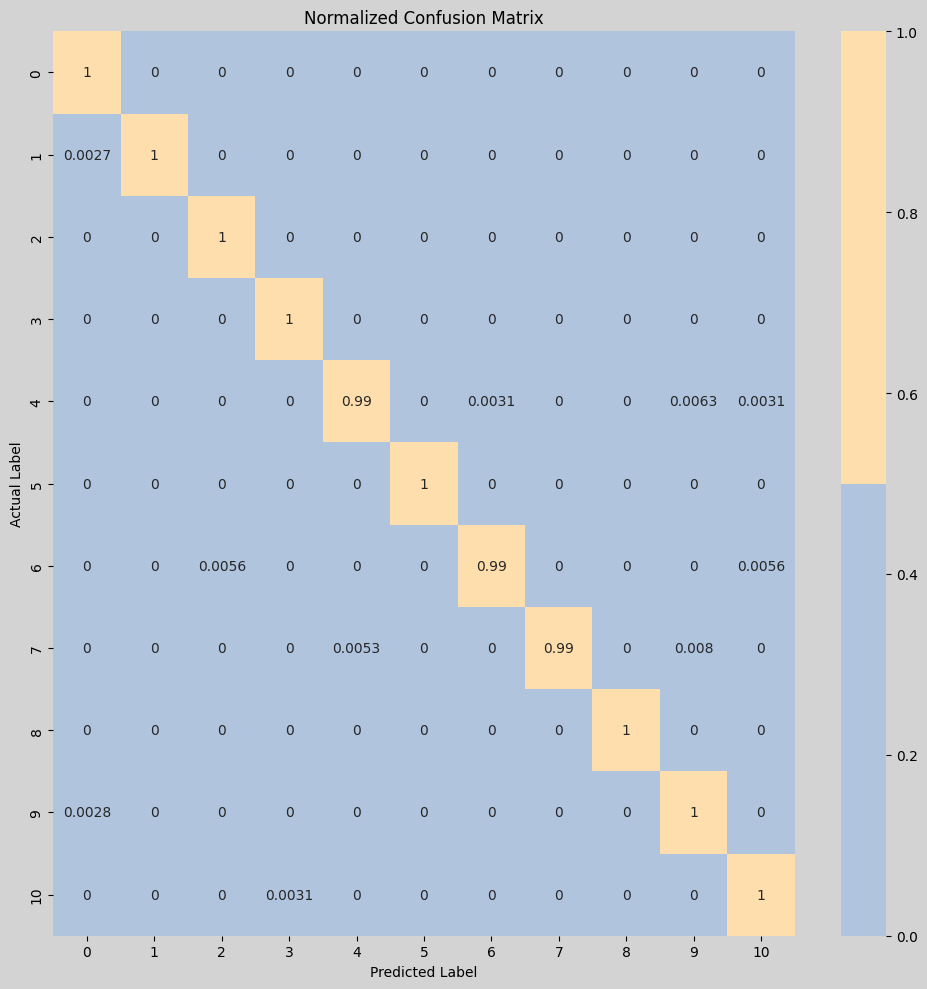

Test Accuracy: 99.55369595536959 %
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       359
           1       1.00      1.00      1.00       365
           2       0.99      1.00      1.00       350
           3       1.00      1.00      1.00       355
           4       0.99      0.99      0.99       318
           5       1.00      1.00      1.00        86
           6       1.00      0.99      0.99       355
           7       1.00      0.99      0.99       375
           8       1.00      1.00      1.00       340
           9       0.99      1.00      0.99       362
          10       0.99      1.00      0.99       320

    accuracy                           1.00      3585
   macro avg       1.00      1.00      1.00      3585
weighted avg       1.00      1.00      1.00      3585



In [21]:
# Plot the confusion matrix
test_conf_matrix = confusion_matrix(y_test, y_pred_test, normalize='true')
plt.figure(figsize=(10, 10), facecolor='lightgrey')
sns.heatmap(test_conf_matrix, annot=True,cmap=['lightsteelblue','navajowhite'])
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.tight_layout()
plt.show()

test_accuracy = accuracy_score(y_test, y_pred_test)
test_classification_rep = classification_report(y_test, y_pred_test)

print(f"Test Accuracy: {test_accuracy*100} %")
print(test_classification_rep)

In [22]:
# Inverse transform numerical labels back to string labels
y_test_actual = label_encoder.inverse_transform(y_test)
y_test_predicted = label_encoder.inverse_transform(y_pred_test)

# Create a new DataFrame for test data and predictions
test_df = pd.DataFrame({'Actual': y_test_actual, 'Predicted': y_test_predicted})
test_df[test_df.Actual != test_df.Predicted]

,Actual,Predicted
391,CO_4000,Toluene_200
632,CO_4000,Ammonia_10000
641,Butanol_100,Toluene_200
653,CO_4000,Ammonia_10000
853,Ethylene_500,Butanol_100
864,Ethylene_500,Butanol_100
921,Butanol_100,Methanol_200
1041,Toluene_200,Benzene_200
1536,CO_4000,Toluene_200
1836,Ethylene_500,Methanol_200
